# Homework w06d03 - Decision Trees and Ensemble methods

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from matplotlib import pyplot as plt
%matplotlib inline

#### 1. Load the Boston housing data set

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [3]:
boston.keys()

['data', 'feature_names', 'DESCR', 'target']

In [4]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
X = pd.DataFrame(boston['data'],columns=boston.feature_names)
y = pd.Series(boston.target,name='MEDV')

In [6]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


#### 2. Rescale the data with the standard scaler 

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=boston.feature_names)
y = pd.Series(scaler.fit_transform(y))

/Users/crahmede/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/crahmede/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [9]:
y.describe()

count    5.060000e+02
mean    -4.247810e-16
std      1.000990e+00
min     -1.908226e+00
25%     -5.994557e-01
50%     -1.450593e-01
75%      2.685231e-01
max      2.989460e+00
dtype: float64

#### 3. Fit the data using a decision tree regressor, split into training and test set and obtain mean squared and r2 error for the test set for a maximal tree depth of three.

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 

model = DecisionTreeRegressor(max_depth=3, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train,y_train)
predictions = model.predict(X_test)

print 'Training error: '
print 'MSE: ', mean_squared_error(y_train,model.predict(X_train))
print 'R2: ', r2_score(y_train,model.predict(X_train))

print 'Test error: '
print 'MSE: ', mean_squared_error(y_test,predictions)
print 'R2: ', r2_score(y_test,predictions)

Training error: 
MSE:  0.189165163803
R2:  0.816178042256
Test error: 
MSE:  0.159974136603
R2:  0.815842780414


#### 4. Visualise the corresponding decision tree

In [11]:
from os import system
from sklearn.tree import export_graphviz

def build_tree_image(model, filename='tree.png'):
    dotfile = open("tree.dot", 'w')
    export_graphviz(model, out_file = dotfile, feature_names = X.columns,filled=True,
                    rounded=True,special_characters=True)
    dotfile.close()
    system("dot -Tpng tree.dot -o {0}".format(filename))  # comment out this line if you don't have GraphViz yet

In [12]:
build_tree_image(model,'tree.png')

<img src='tree.png' width = 80%>

#### 5. Perform grid search varying the maximal tree depth, the maximal number of leaf nodes and the minimal number of samples in the leafs. Use cross_val_score with five-fold cross validation and scoring 'neg_mean_squared_error'.

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict


model = DecisionTreeRegressor(random_state=1)
#Grid Search
PARAMETERS = {'max_depth':[1,2,3,4,5,6],
              #, 'max_features':[1,2,3,4], 
              'max_leaf_nodes':[5,6,7,8,9,10], 'min_samples_leaf':[1,2,3,4]
              #'min_samples_split':[1,2,3,4]
             }

gs = GridSearchCV(model, PARAMETERS,cv=5)
gs.fit(X, y)

model = gs.best_estimator_
print gs.best_estimator_
print 'R2: ', gs.best_score_

kfolds = 5
model1 = gs.best_estimator_
print cross_val_score(model1, X, y, cv=kfolds,scoring='r2'), cross_val_score(model1, X, y, cv=kfolds,scoring='r2').mean()
print -cross_val_score(model1, X, y, cv=kfolds,scoring='neg_mean_squared_error'), -cross_val_score(model1, X, y, cv=kfolds,scoring='neg_mean_squared_error').mean()

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=10, min_impurity_split=1e-07, min_samples_leaf=4,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')
R2:  0.46578357227
[ 0.67155086  0.78499009  0.61165839  0.43620416 -0.17752294] 0.465376112286
[ 0.13436525  0.23186339  0.36841219  0.58578343  0.37086612] 0.33825807584


#### 6. Now use ensemble methods to fit decision trees. For BaggingRegressor, AdaBoostRegressor, ExtraTreesRegressor and RandomForestRegressor, vary the number of estimators (n_estimators). Use cross_val_score with five-fold cross validation and scoring 'neg_mean_squared_error'. Plot how the mean of the scoring changes.

In [14]:
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor

In [15]:
def do_cross_val(model):
    scores = cross_val_score(model, X, y, cv=5, n_jobs=1,scoring='neg_mean_squared_error')
    return -scores.mean()#, scores.std()#, cross_val_score(model, X, y, cv=5, n_jobs=1).mean()

In [16]:
values = sorted(list(set(np.logspace(0, 3, num=20, endpoint=True, base=10.0).astype(int))))

In [198]:
score_list = []
for n in values:
    models = [('Bagging',BaggingRegressor(random_state=1, n_estimators=n)),
          ('RandomForest',RandomForestRegressor(random_state=1, n_estimators=n)),
          ('AdaBoost',AdaBoostRegressor(random_state=1, n_estimators=n)),
          ('ExtraTrees',ExtraTreesRegressor(random_state=1, n_estimators=n))]
    for model in models:
        score = do_cross_val(model[1])
        score_list.append([model[0],n,score])

In [199]:
df_scores = pd.DataFrame(score_list,columns=['model','estimators','mse'])
df_scores.head()

,model,estimators,mse
0,Bagging,1,0.419781
1,RandomForest,1,0.415114
2,AdaBoost,1,0.408926
3,ExtraTrees,1,0.672560
4,Bagging,2,0.363526


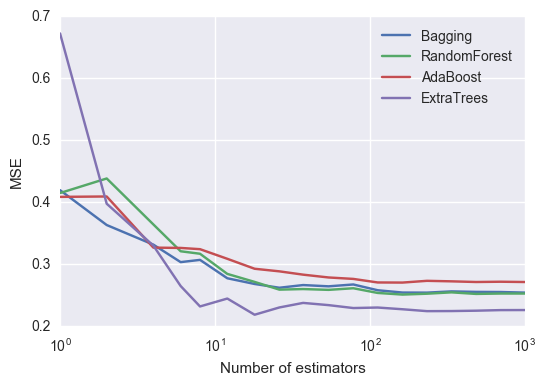

In [202]:
fig, ax = plt.subplots()

for temp in df_scores.model.unique():
    data = df_scores[df_scores['model']==temp]
    ax.plot(data['estimators'], data['mse'], label = "{0}".format(temp))

plt.xlabel("Number of estimators")
plt.ylabel("MSE")
plt.xscale('log')
ax.legend(loc='upper right')
plt.show()

#### Bonus: Vary further parameters and describe the impact on the model score.